## Data Visualization

In this notebook we will cover some of basics of plotting in python, primarily using the [matplotlib](https://matplotlib.org) & [xarray](https://docs.xarray.dev/en/stable/getting-started-guide/index.html) libraries.

Inspired from: https://datalab.marine.rutgers.edu/2020/10/introduction-to-python-part-2/

## Import Modules

There are several packages available in Python to open and plot a netCDF file. 
Here is a table resuming the main modules used in this notebook: 

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python |

In [1]:
# Notebook setup
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

# NDBC Timeseries
Let's load some timeseries data from an [NDBC](https://www.ndbc.noaa.gov) mooring.  We will use this dataset to show how to customize your plot. Also, we will use the power of [Xarray](http://xarray.pydata.org/en/stable/) library in Python to load and process the data.  Xarray is great, especially when dealing with 3D or 4D datasets (e.g. x,y,z,t).

Use open_dataset or open_fdataset to read a single or multiple NetCDF files, and store it in a DataSet called ds.

open_dataset() returns an xarray.Dataset object that is xarray’s multi-dimensional equivalent of a pandas.DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

In [91]:
# Open dataset
ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')
ds

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 456426)
Coordinates:
  * latitude                 (latitude) float32 40.251
  * longitude                (longitude) float32 -73.164
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 2023-12-18T13:00:00
Data variables:
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    mean_wave_dir            (time, latitude, longitude) float64 ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, lat

### Get info about the dataset
Dataset objects have four key properties:
- values: a numpy.ndarray holding the array’s values
- dims: dimension names for each axis (e.g., ('lat', 'lon', 'z', 'time'))
- coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dim arrays of numbers, DateTime objects, or strings)
- attrs: an OrderedDict to hold arbitrary metadata (attributes)

In [5]:
# General information about the data
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 456426)
Coordinates:
  * latitude                 (latitude) float32 40.251
  * longitude                (longitude) float32 -73.164
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 2023-12-18T13:00:00
Data variables:
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    mean_wave_dir            (time, latitude, longitude) float64 ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_s

In [6]:
# Get the full list of variables available in the dataset
ds.data_vars

Data variables:
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    mean_wave_dir            (time, latitude, longitude) float64 ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...

In [8]:
# Get the list of dimensions
ds.coords

Coordinates:
  * latitude   (latitude) float32 40.251
  * longitude  (longitude) float32 -73.164
  * time       (time) datetime64[ns] 1975-10-24T12:00:00 ... 2023-12-18T13:00:00

In [9]:
# Get info on one specific variable (here the temperature)
ds.air_temperature

<xarray.DataArray 'air_temperature' (time: 456426, latitude: 1, longitude: 1)>
[456426 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 40.251
  * longitude  (longitude) float32 -73.164
  * time       (time) datetime64[ns] 1975-10-24T12:00:00 ... 2023-12-18T13:00:00
Attributes:
    long_name:      Air Temperature
    short_name:     atmp
    standard_name:  air_temperature
    units:          degree_Celsius

In [11]:
# Get info on specific dimensions 
ds.time

<xarray.DataArray 'time' (time: 456426)>
array(['1975-10-24T12:00:00.000000000', '1975-10-24T13:00:00.000000000',
       '1975-10-24T14:00:00.000000000', ..., '2023-12-18T12:40:00.000000000',
       '2023-12-18T12:50:00.000000000', '2023-12-18T13:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1975-10-24T12:00:00 ... 2023-12-18T13:00:00
Attributes:
    long_name:      Epoch Time
    short_name:     time
    standard_name:  time

### Data extraction 
Extracting DataArrays from DataSet ds is very straightforward, as ds.<var_name> will suffice. You might consider dropping NaN entries by dropna() and selecting data with sel(). The method parameter in sel() allows us to enable the nearest neighbour (inexact) lookups by use of the methods 'pad', 'backfill', or 'nearest'. To specify a range, use slice().

You can transform xr.DataArray to numpy.ndarray by da.values.

In [6]:
# Subset the dataset to 1 year
ds = ds.sel(time=slice('2019-01-01','2020-01-01'))

In [14]:
type(ds)

xarray.core.dataset.Dataset

In [13]:
da_numpy = ds.air_temperature.values

In [15]:
type(da_numpy)

numpy.ndarray

In [16]:
da_numpy.shape

(456426, 1, 1)

### Simple computations
You can do arithmetic directly on Dataset and DataArray objects. Labels are preserved, although attributes removed.

In [19]:
ds.mean(dim='time')

/home/gkara/anaconda3/envs/dev/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1)
Coordinates:
  * latitude                 (latitude) float32 40.251
  * longitude                (longitude) float32 -73.164
Data variables:
    wind_dir                 (latitude, longitude) float64 198.5
    wind_spd                 (latitude, longitude) float32 6.537697
    gust                     (latitude, longitude) float32 8.140889
    wave_height              (latitude, longitude) float32 1.2792075
    dominant_wpd             (latitude, longitude) timedelta64[ns] 00:00:07.307497
    average_wpd              (latitude, longitude) timedelta64[ns] 00:00:05.094541
    mean_wave_dir            (latitude, longitude) float64 162.4
    air_pressure             (latitude, longitude) float32 1016.1371
    air_temperature          (latitude, longitude) float32 12.323198
    sea_surface_temperature  (latitude, longitude) float32 14.01846
    dewpt_temperature        (latitude, longitude) float32 8.548916
    visibi

In [22]:
ds.air_temperature.min()

<xarray.DataArray 'air_temperature' ()>
array(-14.5)

You can also apply NumPy "universal functions" like np.sqrt to DataArray objects:

In [24]:
np.sqrt(ds.air_temperature)

/home/gkara/anaconda3/envs/dev/lib/python3.7/site-packages/xarray/core/computation.py:609: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


<xarray.DataArray 'air_temperature' (time: 456426, latitude: 1, longitude: 1)>
array([[[4.       ]],

       [[4.0249224]],

       [[4.037326 ]],

       ...,

       [[      nan]],

       [[      nan]],

       [[      nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 40.251
  * longitude  (longitude) float32 -73.164
  * time       (time) datetime64[ns] 1975-10-24T12:00:00 ... 2023-12-18T13:00:00

### Plotting
Xarray comes with built-in plotting, based on matplotlib

/home/gkara/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


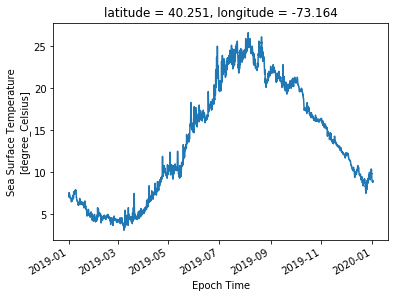

In [7]:
ds.sea_surface_temperature.plot()

## Customizing Timeseries Plots
There are a few ways to customize your plot.  

### Customizing Lines
Here are some of the more common parameters you will typically use when creating your plot.

* **linewidth** - For example 0.5, 1, 2...
* **linestyle** - For example '-','--', or ':' or other [basic](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) or [advanced](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html) styles
* [**color**](https://matplotlib.org/gallery/color/named_colors.html)
* [**marker**](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
* **label** - The name of the line, used in a legend (see the next section)

For reference and inspiration, you can also check out the [Matplotlib Gallery](https://matplotlib.org/gallery/index.html) & [xarray plotting](https://docs.xarray.dev/en/latest/user-guide/plotting.html).

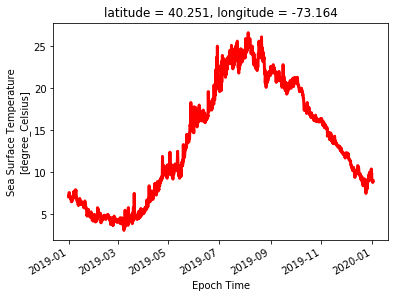

In [8]:
# Line Example
ds.sea_surface_temperature.plot(color='red', linewidth=3)

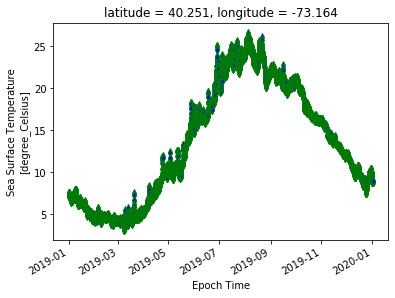

In [9]:
# Custom Markers Example
ds.sea_surface_temperature.plot(color='red', linestyle='', \
                                marker='d', markerfacecolor='b',\
                                markeredgecolor='g', markersize=5)

In [10]:
# Your Turn - Create a graph of air temperature using blue dots

### Customizing the Axis
* Axis Title: `plt.title('Title')`
* Legend: `plt.legend()`
* Axes Labels: `plt.xlabel('Time')` or `plt.ylabel('Temperature')`
* Axes Limits: `plt.ylim([-5,5])`

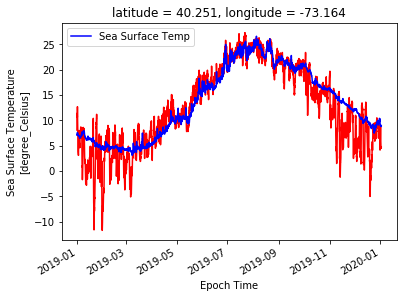

In [11]:
# Incomplete Example
ds.air_temperature.plot(color='red')
ds.sea_surface_temperature.plot(color='blue', label='Sea Surface Temp')
plt.legend()

In [12]:
# Your Turn - Fix the legend, and add a title and y label to the above plot. 

### Customizing Time Axes Limits
There are a few ways you can change the x-axis limits when you are working with timeplots.  By default, plots will show the full range of data, with a little bit of padding on each side.

To plot just the full **Full Time Range** of data, you can use
`plt.xlim(df.index.min(),df.index.max())` 

To plot a **Specific Time Range**, you can use
`plt.xlim(datetime.date(2017,4,1),datetime.date(2019,10,1))`
Note you will need to run `import datetime` first for this command to run.

When you customize date limits you may also need to rotate your tick labels to prevent them from overlapping.  One solution that might work is 
`plt.xticks(rotation=45)`

In [13]:
# Your Turn - Try changing the y and/or x limits for the above plot

### Adding Subplots and Saving
We can create a figure with multiple plots using the subplots feature.

And we can save a figure to a file using `fig.savefig()`

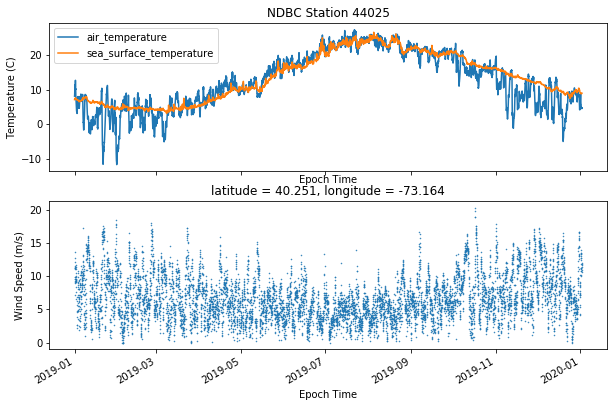

In [24]:
# Subplot example
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))

ds.air_temperature.plot(ax=ax1, label='air_temperature')
ds.sea_surface_temperature.plot(ax=ax1, label='sea_surface_temperature')
ds.wind_spd.plot(ax=ax2, marker='.',linestyle='',markersize=1)

ax1.legend()
ax1.set_ylabel('Temperature (C)')
ax2.set_ylabel('Wind Speed (m/s)')
ax1.set_title('NDBC Station 44025');

# Save the figure to a file
fig.savefig('44025_example.png')

In [15]:
# Your Turn - Recreate the above plot with a 3rd or 4th subplot using other variables

## Scatterplot
When two variables are plotted against each other, this is typically called a scatterplot.  They are really no different than the plots we crated above.  We just need to pick two variables, and use a marker instead of a line.

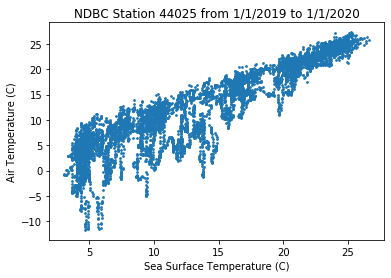

In [25]:
# https://docs.xarray.dev/en/latest/generated/xarray.DataArray.plot.scatter.html
ds.plot.scatter(x='sea_surface_temperature',y='air_temperature', s=3)

plt.xlabel('Sea Surface Temperature (C)')
plt.ylabel('Air Temperature (C)')
plt.title('NDBC Station 44025 from 1/1/2019 to 1/1/2020');

In [26]:
# Your Turn - Create a scatterplot of winds vs. waves

One of the big advantages of the `.scatter()` function, is that you can also color and size the dots based on a variable, rather than having them all be the same.

In [27]:
# Your Turn - Now try coloring it using temperature or time

## Histogram
We can easily create [histograms](https://matplotlib.org/gallery/statistics/hist.html?highlight=histogram) of a single variable.  Use the `bins` parameter to increase or decrease the number of data bins. For use with xarray see also: https://docs.xarray.dev/en/latest/generated/xarray.plot.hist.html

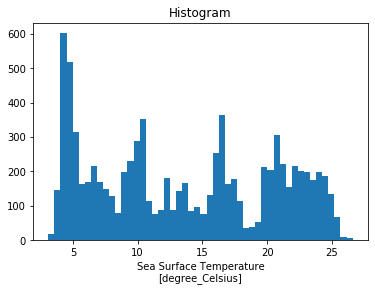

In [28]:
# We can also easily create histograms
ds['sea_surface_temperature'].plot.hist(bins=50);

In [29]:
# Your Turn - Create a histogram of another variable

### Resamble data

In [30]:
monthly_means = ds.sea_surface_temperature[:,0,0].resample(time='M').mean()
monthly_means


<xarray.DataArray 'sea_surface_temperature' (time: 13)>
array([ 6.1175103,  4.565522 ,  4.512757 ,  7.95466  , 12.03459  ,
       17.813581 , 23.064556 , 23.4251   , 20.939165 , 17.77453  ,
       13.810833 ,  9.936474 ,  8.883334 ], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-31 2019-02-28 ... 2020-01-31
    latitude   float32 40.251
    longitude  float32 -73.164

### Maps with the Cartopy Package

Check https://marine.copernicus.eu/ for oceanography datasets (model or observations).
Here, we will use model data from [Mediterranean Sea Physics Analysis and Forecast](https://data.marine.copernicus.eu/product/MEDSEA_ANALYSISFORECAST_PHY_006_013/description) product.

In [38]:
# Open a NetCdf file with Mediterranean Temperature
ds1 = xr.open_dataset('./data/MEDSEA_ANALYSISFORECAST_PHY_006_013_y2024m03d26.nc')
ds1

<xarray.Dataset>
Dimensions:    (depth: 136, latitude: 379, longitude: 1015, time: 1)
Coordinates:
  * depth      (depth) float32 3.1657474 5.4649634 ... 5224.7446 5328.5938
  * latitude   (latitude) float32 30.1875 30.229166 ... 45.895832 45.9375
  * longitude  (longitude) float32 -6.0 -5.9583335 ... 36.208332 36.25
  * time       (time) datetime64[ns] 2024-03-26
Data variables:
    bottomT    (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.0
    bulletin_date:             20230607
    bulletin_type:             analysis
    comment:                   Please check in CMEMS catalogue the INFO secti...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    field_type:                daily_mean_centered_at_time_field
    institution:               Centro Euro-Mediterraneo sui Cambiamenti Clima...
    references:                Clementi, E., Drudi, M., Aydogdu, A., Moulin,

We create a subsetted dataset, by indicating the needed parameters , that we'll extract from our dataset <code>ds1</code>, using the <code>.isel()</code> and <code>.sel()</code> functions of <code>xarray</code> (for [more info](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.sel.html)).

If we try to plot the data variable 'thetao', by default we get the logical coordinates.

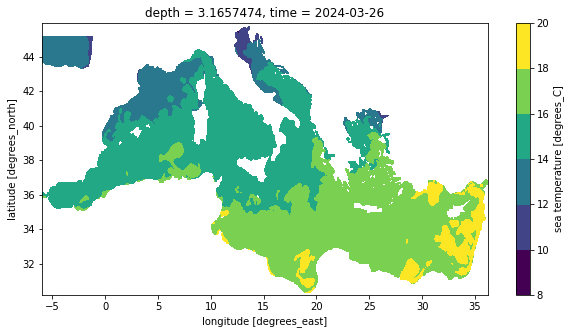

In [40]:
ds1.isel(time=0, depth=0).thetao.plot.contourf(figsize=(10,5))

In order to visualize the data on a conventional latitude-longitude grid, we can take advantage of xarray’s ability to apply cartopy map projections.

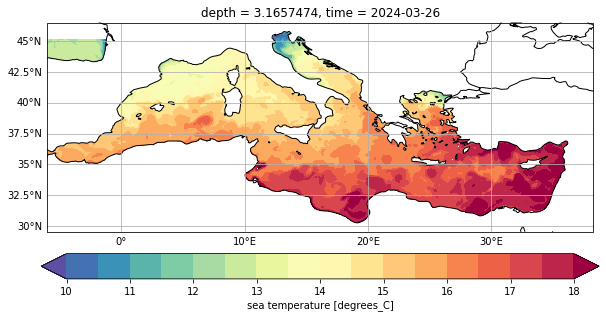

In [104]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ds1.thetao[0,0,:].plot.contourf(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    x="longitude", y="latitude",
    levels=17, vmin=10, vmax=18, cmap='Spectral_r', 
    cbar_kwargs={'orientation': 'horizontal', 'pad': 0.08})

ax.coastlines()                                             # add the coastlines
gl = ax.gridlines(draw_labels=True)                         # add gridlines
gl.right_labels = False                                     # remove latitude labels on the right
gl.top_labels = False                                       # remove longitude labels on the top

We can however **zoom** on a specific area and **customize** the plot by adding some details and personalising it, using the `matplotlib` package.

In [111]:
sub_lon = slice(20, 36)     #longitude
sub_lat = slice(31, 42)    #latitude

In [112]:
# Create a new dataset on the over the selected area
ds2 = ds1.sel(longitude = sub_lon, latitude = sub_lat)
ds2

<xarray.Dataset>
Dimensions:    (depth: 136, latitude: 264, longitude: 385, time: 1)
Coordinates:
  * depth      (depth) float32 3.1657474 5.4649634 ... 5224.7446 5328.5938
  * latitude   (latitude) float32 31.020834 31.0625 ... 41.9375 41.979168
  * longitude  (longitude) float32 20.0 20.041666 20.083334 ... 35.958332 36.0
  * time       (time) datetime64[ns] 2024-03-26
Data variables:
    bottomT    (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.0
    bulletin_date:             20230607
    bulletin_type:             analysis
    comment:                   Please check in CMEMS catalogue the INFO secti...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    field_type:                daily_mean_centered_at_time_field
    institution:               Centro Euro-Mediterraneo sui Cambiamenti Clima...
    references:                Clementi, E., Drudi, M., Aydogdu, A., 

##### And we generate the 2D map over this region:


Text(0.5, 1.0, 'East Med - Sea Surface Temperature')

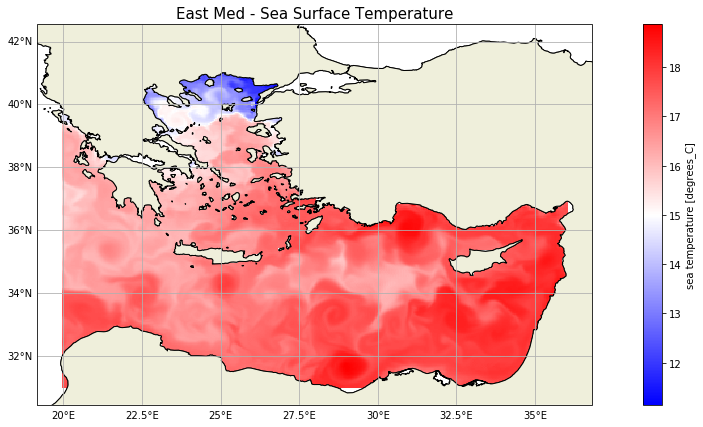

In [114]:
## Add coastlines and land feature 
f = plt.figure(figsize=(18, 7))                             # define the size of the plot
ax = plt.axes(projection=ccrs.PlateCarree())                # define the projection                                    
ax.coastlines()                                             # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')      # add continent
gl = ax.gridlines(draw_labels=True)                         # add gridlines
gl.right_labels = False                                     # remove latitude labels on the right
gl.top_labels = False                                       # remove longitude labels on the top

## Generate plot with colobar
ds2.thetao[0,0,:].plot(cmap='bwr')                          # cmap -> colorbar                                                   

## Add title
plt.title(f'East Med - Sea Surface Temperature', fontsize=15)   # add title to the plot


# Additional Resources
If you are interested in seeing some additional examples of the plotting features available in python, I encourage you to visit the following pages.

* [Matplotlib Examples](https://matplotlib.org/gallery/index.html) - See what else this library can do.
* [Xarray Gallery](https://docs.xarray.dev/en/stable/gallery.html) - See the capabilities of Xarray.
* [Altair Example Gallery](https://altair-viz.github.io/gallery/index.html) - A more advanced tool for creating interactive graphs.
* [Python Graph Gallery](https://python-graph-gallery.com/) - A great resource for learning about common data visualization styles and how to create them in python.